Importing Libraries

In [10]:
import numpy as np
import threading
import time
import psutil

Constant Matrix of 100 x 100

In [11]:
#size taken 100 due to slow processing
constant_matrix = np.random.randint(0,9, size=(100, 100))
constant_matrix

array([[4, 7, 3, ..., 1, 3, 1],
       [0, 5, 7, ..., 3, 1, 4],
       [0, 7, 0, ..., 4, 0, 1],
       ...,
       [5, 4, 2, ..., 1, 6, 4],
       [3, 1, 8, ..., 0, 2, 8],
       [4, 4, 8, ..., 6, 5, 5]])

100 Random matrices

In [12]:
#size taken 100 due to slow processing(multiplication)
matrices = []
for i in range(100):
    matrix = np.random.randint(0, 9, size=(100, 100))
    matrices.append(matrix)

Matrix Multiplication

In [13]:
def matmul(constant_matrix,matrices,st,ed,cpu): #st= starting index, ed= ending index
    result=constant_matrix
    for i in range(st,ed):
        result = np.dot(result,matrices[i])
        cpu.append(psutil.cpu_percent(interval=0.1))
    return result

To store time taken

In [14]:
data=[[] for i in range(8)]

Implementation

In [15]:
for w in range(1,9):
    c=w
    print("TOTAL THREADS = ",c)
    t = [None] * c
    cpu_p =[[] for q in range(c)]
    s=0
    size=100//c
    r=100 % c
    start = time.time()
    for i in range (c):
        j = s + size
        if i < r:
            j =j+ 1
        t[i]=threading.Thread(target=matmul, args=(constant_matrix,matrices,int(s),int(j),cpu_p[i]))
        t[i].start()
        s=j
    for i in range (c):
        t[i].join()
    for i, percentages in enumerate(cpu_p):
        total_percentage = sum(percentages)
        average_percentage = total_percentage / len(percentages)
        print(f"Thread {i + 1} Average CPU Usage : ",average_percentage) #Prints AVERAGE CPU USAGE
    end = time.time()
    data[c-1].append(end-start)
    print()

TOTAL THREADS =  1
Thread 1 Average CPU Usage :  9.987

TOTAL THREADS =  2
Thread 1 Average CPU Usage :  2.3639999999999994
Thread 2 Average CPU Usage :  2.1979999999999995

TOTAL THREADS =  3
Thread 1 Average CPU Usage :  4.194117647058823
Thread 2 Average CPU Usage :  4.624242424242424
Thread 3 Average CPU Usage :  3.963636363636364

TOTAL THREADS =  4
Thread 1 Average CPU Usage :  35.4
Thread 2 Average CPU Usage :  35.648
Thread 3 Average CPU Usage :  35.528
Thread 4 Average CPU Usage :  35.256

TOTAL THREADS =  5
Thread 1 Average CPU Usage :  5.0249999999999995
Thread 2 Average CPU Usage :  4.7
Thread 3 Average CPU Usage :  5.174999999999999
Thread 4 Average CPU Usage :  5.1899999999999995
Thread 5 Average CPU Usage :  4.954999999999999

TOTAL THREADS =  6
Thread 1 Average CPU Usage :  5.229411764705882
Thread 2 Average CPU Usage :  4.305882352941176
Thread 3 Average CPU Usage :  6.023529411764706
Thread 4 Average CPU Usage :  5.429411764705883
Thread 5 Average CPU Usage :  5.04374

Result Table

In [16]:
import pandas as pd
d = np.array(data)
dd= np.reshape(d, (1, 8))
df = pd.DataFrame(dd, columns=['T1', 'T2', 'T3', 'T4', 'T5', 'T6','T7','T8'],index=['Time Taken'])
df

,T1,T2,T3,T4,T5,T6,T7,T8
Time Taken,10.160443,5.100871,3.46469,2.558306,2.043985,1.740611,1.53515,1.338899


Graph

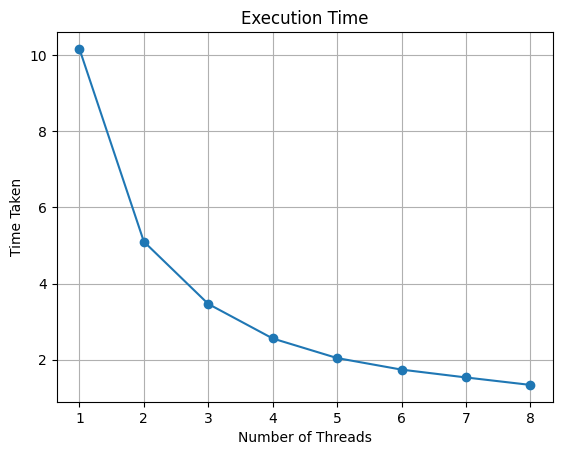

In [17]:
import matplotlib.pyplot as plt
threads = list(range(1,9))
plt.plot(threads, d, marker='o', linestyle='-')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken')
plt.title('Execution Time')
plt.grid(True)
plt.show()
